In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
from etna.datasets import TSDataset, generate_ar_df
import pandas as pd
from copy import deepcopy
import numpy as np
from etna.transforms import MedianOutliersTransform

In [35]:
df = generate_ar_df(n_segments=3, periods=100, start_time="2000-01-01")
ts = TSDataset(df=TSDataset.to_dataset(df), freq="D")

In [36]:
transform = MedianOutliersTransform(in_column="target", alpha=1)

In [37]:
%time _ = transform.fit_transform(deepcopy(ts))

CPU times: user 29.5 ms, sys: 2 ms, total: 31.5 ms
Wall time: 29.9 ms


In [25]:
from etna.analysis.outliers import get_anomalies_median, plot_anomalies

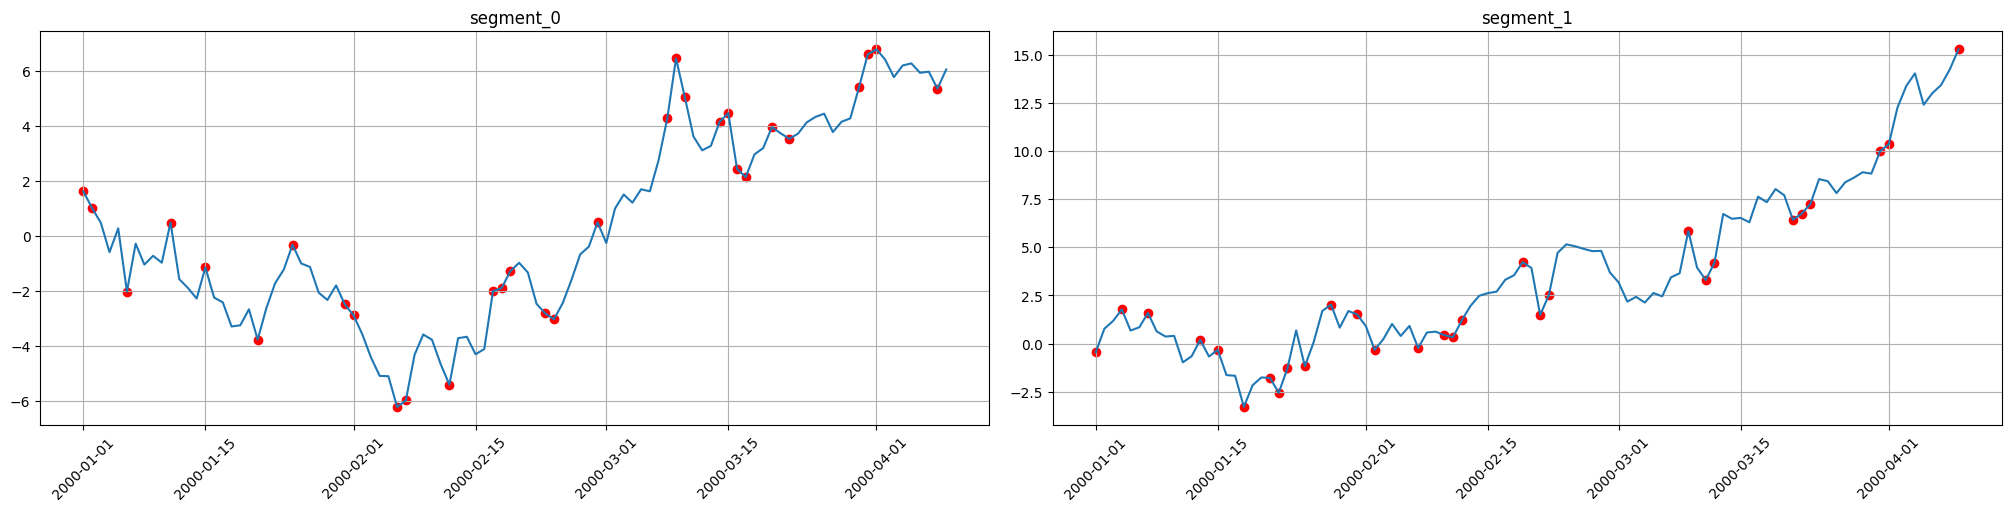

In [26]:
outliers_t = get_anomalies_median(ts=ts, alpha=1)
plot_anomalies(ts, outliers_t)

In [39]:
transform.original_values["segment_0"]

timestamp
2000-01-01    1.624345
2000-01-02    1.012589
2000-01-06   -2.024682
2000-01-11    0.490699
2000-01-15   -1.142144
2000-01-21   -3.767912
2000-01-25   -0.318247
2000-01-31   -2.489828
2000-02-01   -2.886582
2000-02-06   -6.220181
2000-02-07   -5.985765
2000-02-12   -5.410542
2000-02-17   -2.013104
2000-02-18   -1.892946
2000-02-19   -1.275742
2000-02-23   -2.819683
2000-02-24   -3.028577
2000-02-29    0.498860
2000-03-08    4.276560
2000-03-09    6.462135
2000-03-10    5.065639
2000-03-14    4.153265
2000-03-15    4.468900
2000-03-16    2.446699
2000-03-17    2.140495
2000-03-20    3.960576
2000-03-22    3.537489
2000-03-30    5.409617
2000-03-31    6.608535
2000-04-01    6.793692
2000-04-08    5.360253
Name: target, dtype: float64

In [42]:
df = TSDataset.to_dataset(df)

In [45]:
df.loc[outliers_t["segment_0"], pd.IndexSlice["segment_0", "target"]]

timestamp
2000-01-01    1.624345
2000-01-02    1.012589
2000-01-06   -2.024682
2000-01-11    0.490699
2000-01-15   -1.142144
2000-01-21   -3.767912
2000-01-25   -0.318247
2000-01-31   -2.489828
2000-02-01   -2.886582
2000-02-06   -6.220181
2000-02-07   -5.985765
2000-02-12   -5.410542
2000-02-17   -2.013104
2000-02-18   -1.892946
2000-02-19   -1.275742
2000-02-23   -2.819683
2000-02-24   -3.028577
2000-02-29    0.498860
2000-03-08    4.276560
2000-03-09    6.462135
2000-03-10    5.065639
2000-03-14    4.153265
2000-03-15    4.468900
2000-03-16    2.446699
2000-03-17    2.140495
2000-03-20    3.960576
2000-03-22    3.537489
2000-03-30    5.409617
2000-03-31    6.608535
2000-04-01    6.793692
2000-04-08    5.360253
Name: (segment_0, target), dtype: float64

In [49]:
pd.Series(data=np.array([1,2,3]), index=np.array([4,5,6]))

4    1
5    2
6    3
dtype: int64

In [53]:
import math

In [79]:
window_size = 10
alpha=1
in_column = "target"

segments = np.array(sorted(ts.segments))
values = ts.df.loc[:, pd.IndexSlice[segments, in_column]].values
timestamp = ts.index.values

anomalies_rows, anomalies_cols = [], []
n_iter = math.ceil(len(timestamp) / window_size)
for i in range(n_iter):
    left_border = i * window_size
    right_border = min(left_border + window_size, len(values))
    med = np.median(values[left_border:right_border])
    std = np.std(values[left_border:right_border])
    diff = np.abs(values[left_border:right_border] - med)
    row, col = np.nonzero(diff > std * alpha)
    row += left_border
    anomalies_rows.extend(row)
    anomalies_cols.extend(col)

In [75]:
anomalies_values = values[anomalies_rows, anomalies_cols]

In [81]:
segment_values = segments[anomalies_cols]

In [84]:
timestamps = timestamp[anomalies_rows]

In [85]:
anomalies_df = pd.DataFrame({
    "timestamp": timestamps,
    "segment": segment_values,
    "target": anomalies_values
})

In [88]:
anomalies_df.groupby("segment")["timestamp"].agg(list).to_dict()

{'segment_0': [Timestamp('2000-01-06 00:00:00'),
  Timestamp('2000-01-11 00:00:00'),
  Timestamp('2000-01-21 00:00:00'),
  Timestamp('2000-01-22 00:00:00'),
  Timestamp('2000-01-29 00:00:00'),
  Timestamp('2000-01-31 00:00:00'),
  Timestamp('2000-02-01 00:00:00'),
  Timestamp('2000-02-02 00:00:00'),
  Timestamp('2000-02-03 00:00:00'),
  Timestamp('2000-02-04 00:00:00'),
  Timestamp('2000-02-05 00:00:00'),
  Timestamp('2000-02-06 00:00:00'),
  Timestamp('2000-02-07 00:00:00'),
  Timestamp('2000-02-08 00:00:00'),
  Timestamp('2000-02-09 00:00:00'),
  Timestamp('2000-02-11 00:00:00'),
  Timestamp('2000-02-12 00:00:00'),
  Timestamp('2000-03-09 00:00:00'),
  Timestamp('2000-03-10 00:00:00')],
 'segment_1': [Timestamp('2000-01-12 00:00:00'),
  Timestamp('2000-01-13 00:00:00'),
  Timestamp('2000-01-14 00:00:00'),
  Timestamp('2000-01-15 00:00:00'),
  Timestamp('2000-01-22 00:00:00'),
  Timestamp('2000-01-27 00:00:00'),
  Timestamp('2000-01-28 00:00:00'),
  Timestamp('2000-01-30 00:00:00'),
 

In [90]:
for seg, df_ in anomalies_df.groupby("segment"):
    pass

In [103]:
from collections import defaultdict
from itertools import groupby

In [98]:
x = defaultdict(list)

In [109]:
for seg, _ in groupby(sorted(zip(segment_values, timestamps, anomalies_values)), key=lambda x: x[0]):
    print(seg)
    print(list(_))

segment_0
[('segment_0', numpy.datetime64('2000-01-06T00:00:00.000000000'), -2.024682491962064), ('segment_0', numpy.datetime64('2000-01-11T00:00:00.000000000'), 0.4906990289839759), ('segment_0', numpy.datetime64('2000-01-21T00:00:00.000000000'), -3.7679119064275084), ('segment_0', numpy.datetime64('2000-01-22T00:00:00.000000000'), -2.6231881965878943), ('segment_0', numpy.datetime64('2000-01-29T00:00:00.000000000'), -2.328522786406885), ('segment_0', numpy.datetime64('2000-01-31T00:00:00.000000000'), -2.489828071394008), ('segment_0', numpy.datetime64('2000-02-01T00:00:00.000000000'), -2.8865815982499856), ('segment_0', numpy.datetime64('2000-02-02T00:00:00.000000000'), -3.573754298369585), ('segment_0', numpy.datetime64('2000-02-03T00:00:00.000000000'), -4.418959939868305), ('segment_0', numpy.datetime64('2000-02-04T00:00:00.000000000'), -5.090206070705124), ('segment_0', numpy.datetime64('2000-02-05T00:00:00.000000000'), -5.102870669624025), ('segment_0', numpy.datetime64('2000-02-

In [108]:
list(_)

[]